# Combine

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 1842 1843

download_chandra_obsid 1842,1843
chandra_repro 1842,1843 out= clob+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       36 Mb  ####################          < 1 s  105782.4 kb/s
  evt2     fits       19 Mb  ####################          < 1 s  103653.1 kb/s
  vvref    pdf        17 Mb  ####################          < 1 s  89042.2 kb/s
  asol     fits        2 Mb  ####################          < 1 s  64718.1 kb/s
  cntr_img jpg       798 Kb  ####################          < 1 s  41605.2 kb/s
  bias     fits      496 Kb  ####################          < 1 s  29475.1 kb/s
  bias     fits      430 Kb  ####################          < 1 s  27793.1 kb/s
  bias     fits      427 Kb  ####################          < 1 s  16005.2 kb/s
  bias     fits      427 Kb  ####################          < 1 s  27245.8 kb/s
  bias     fits      426 Kb  ####################          < 1 s  27315.3 kb/s
  bias     fits      424 Kb  ####################  

## Merging about common tan point

In [3]:
/bin/rm -rf merged1
reproject_obs 1842,1843 merged1/ \
   refcoord=1843/repro/acisf01843_repro_evt2.fits clob+

Running reproject_obs
Version: 15 November 2021

Found 1842/repro/acisf01842_repro_evt2.fits
Found 1843/repro/acisf01843_repro_evt2.fits
Verifying 2 observations.
Tangent point is taken from the file 1843/repro/acisf01843_repro_evt2.fits
New tangent point: RA=18h 32m 11.140s Dec=-10d 34' 9.85"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 1843  2000-09-02   7.9 ACIS-012367 -245.857 153.4   0.0    +0
2 1842  2000-09-02   7.4 ACIS-012367 -231.239 153.4   5.1  +101

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to merged1/merged_evt.fits

The following files were created:

The reprojected FOV files:
     merged1/1843.fov
     merged1/1842.fov

The combined FOV file:
     merged1/merged.fov

The reprojected event files:
     m

In [4]:
dmhistory merged1/merged_evt.fits reproject_obs 

# dmhistory (CIAO 4.15): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.15): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.15): WARNING: Found and corrected "pixlib" library parameters

reproject_obs infiles="1842,1843" outroot="merged1/" asolfiles="" merge="yes" refcoord="1843/repro/acisf01843_repro_evt2.fits" parallel="yes" nproc="INDEF" linkfiles="yes" tmpdir="./" clobber="yes" verbose="1" 



In [5]:
ls -1 merged1/

1842.asol
1842.bpix
1842.fov
1842.mask
1842_reproj_evt.fits
1843.asol
1843.bpix
1843.fov
1843.mask
1843_reproj_evt.fits
merged.fov
merged_evt.fits


In [6]:
ds9 -cmap b merged1/merged_evt.fits -bin filter 'energy=500:7000' \
  -bin about 3815 3975 -zoom 8 \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

[1] 1932803
[1]+  Done                    ds9 -cmap b merged1/merged_evt.fits -bin filter 'energy=500:7000' -bin about 3815 3975 -zoom 8 -saveimage png ds9_01.png


## Merging about specifc ra/dec

In [7]:
/bin/rm -rf merged2
punlearn reproject_obs
reproject_obs 1842,1843 merged2/ refcoord="278.086,-10.58625" cl+

Running reproject_obs
Version: 15 November 2021

Found 1842/repro/acisf01842_repro_evt2.fits
Found 1843/repro/acisf01843_repro_evt2.fits
Verifying 2 observations.
New tangent point: RA=18h 32m 20.640s Dec=-10d 35' 10.50"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 1843  2000-09-02   7.9 ACIS-012367 -245.857 153.4   2.5   -67
2 1842  2000-09-02   7.4 ACIS-012367 -231.239 153.4   2.7   +89

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to merged2/merged_evt.fits

The following files were created:

The reprojected FOV files:
     merged2/1843.fov
     merged2/1842.fov

The combined FOV file:
     merged2/merged.fov

The reprojected event files:
     merged2/1843_reproj_evt.fits
     merged2/1842_reproj_evt.fits

The merged 

In [8]:
dmhistory merged2/merged_evt.fits reproject_obs 

# dmhistory (CIAO 4.15): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.15): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.15): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.15): WARNING: Found and corrected "pixlib" library parameters

reproject_obs infiles="1842,1843" outroot="merged2/" asolfiles="" merge="yes" refcoord="278.086,-10.58625" parallel="yes" nproc="INDEF" linkfiles="yes" tmpdir="./" clobber="yes" verbose="1" 



[1] 1935440
[1]+  Done                    ds9 -cmap b merged2/merged_evt.fits -bin filter 'energy=500:7000' -zoom 8 -saveimage png ds9_02.png


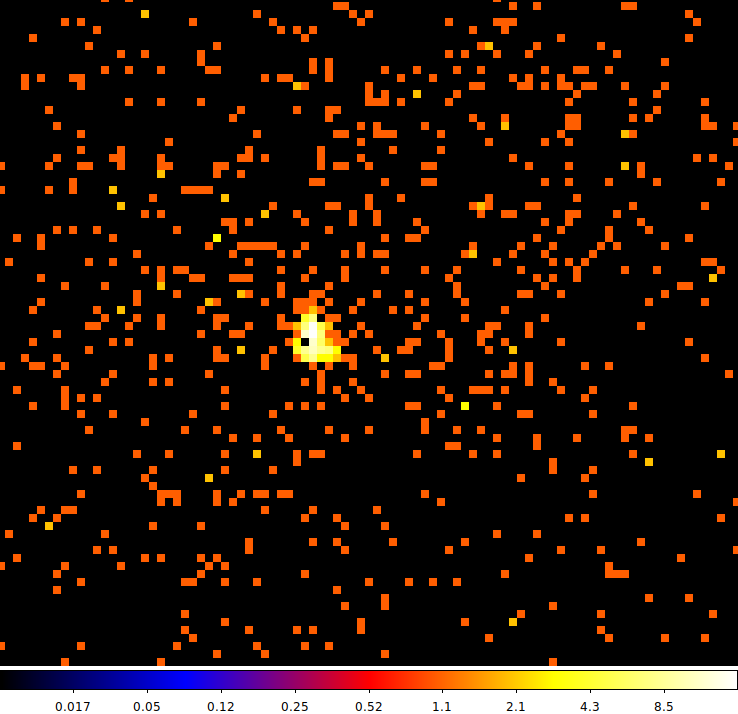

In [9]:
ds9 -cmap b merged2/merged_evt.fits -bin filter 'energy=500:7000' -zoom 8 \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

## Correct aspect

In [10]:
#ds9 1842/repro/acisf01842_repro_evt2.fits


In [11]:
dmcopy "1842/repro/acisf01842_repro_evt2.fits[energy=500:7000][sky=circle(4418,4087,5)]" - | dmstat "-[cols eqpos]"
p1=`pget dmstat out_mean`
p1x=`stk_read_num ")dmstat.out_mean" 1 echo+`
p1y=`stk_read_num ")dmstat.out_mean" 2 echo+`

EQPOS(RA, DEC)[deg]
    min:	( 278.08616151 -10.587086206 )	      @:	( 63 70 )
    max:	( 278.08718637 -10.586138674 )	      @:	( 34 12 )
   mean:	( 278.08680354 -10.586491986 )
  sigma:	( 0.00022748737552 0.00016481664255 )
    sum:	( 22246.944283 -846.91935884 )
   good:	( 80 80 )
   null:	( 0 0 )



In [12]:
#ds9 1843/repro/acisf01843_repro_evt2.fits 


In [13]:
dmcopy "1843/repro/acisf01843_repro_evt2.fits[energy=500:7000][sky=circle(3805,3974,5)]" - | dmstat "-[cols eqpos]"
p2=`pget dmstat out_mean`
p2x=`stk_read_num ")dmstat.out_mean" 1 echo+`
p2y=`stk_read_num ")dmstat.out_mean" 2 echo+`

EQPOS(RA, DEC)[deg]
    min:	( 278.08649298 -10.58658084 )	      @:	( 14 42 )
    max:	( 278.08732554 -10.585526826 )	      @:	( 26 97 )
   mean:	( 278.08692147 -10.586098349 )
  sigma:	( 0.000140929028 0.00020055219192 )
    sum:	( 31423.822127 -1196.2291135 )
   good:	( 113 113 )
   null:	( 0 0 )



In [14]:
echo $p1x $p2x
echo $p1y $p2y

278.08680354 278.08692147
-10.586491986 -10.586098349


In [15]:
echo $p1
echo $p2

278.08680354,-10.586491986
278.08692147,-10.586098349


In [16]:
punlearn wcs_update

cat << EOM > p1.py
import numpy as np
ra1 = $p1x
ra2 = $p2x
dec1 = $p1y
dec2 = $p2y
dra = ra2 - ra1
print(dra)
ddec = dec2 - dec1
print(ddec)

mean_dec = ( dec1 + dec2 )/2.0
dra2 = dra * np.cos(mean_dec * np.pi / 180.0)
print(dra2)
conv = 0.492 / 3600
dx = dra2 * -1 / conv
dy = ddec / conv

print("dx={} dy={}".format(dx,dy))

from paramio import pset
pset("wcs_update","deltax",str(dx))
pset("wcs_update","deltay",str(dy))
EOM


python p1.py
plist wcs_update



0.00011792999998760934
0.00039363700000016877
0.00011592275133369907
dx=-0.8482152536612126 dy=2.880270731708552

Parameters for /proj/sds/Staff/kjg/Test/Threads/param/wcs_update.par

#
#  wcs_update parameter file
#
        infile =                  Either input asol file, or file with WCS to be updated
       outfile =                  Output asol file
 transformfile =                  Input coordinate transform file
      (wcsfile = )                Input reference WCS file
      (logfile = STDOUT)          debug log file ( STDOUT | stdout | <filename>)
       (deltax = -0.8482152536612126) transform delta_x value (sky pixels)
       (deltay = 2.880270731708552) transform delta_y value (sky pixels)
       (rotang = 0)               transform rotation angle (degrees)
     (scalefac = 1)               transform scale factor
      (clobber = no)              Overwrite existing output dataset with same name?
      (verbose = 0)               debug level (0-5)
         (mode = ql)       

In [17]:
pset wcs_update infile= 1842/repro/pcadf01842_000N001_asol1.fits
pset wcs_update outfile=1842/repro/new_asol1.fits
pset wcs_update wcsfile=1843/repro/acisf01843_repro_evt2.fits
wcs_update mode=h clob+


In [18]:
dmcopy 1842/repro/acisf01842_repro_evt2.fits 1842/repro/new_evt2.fits clob+

In [19]:
wcs_update 1842/repro/new_evt2.fits outfile= mode=h 

In [20]:
dmhedit 1842/repro/new_evt2.fits filelist= op=add key=ASOLFILE value=new_asol1.fits

In [21]:
punlearn reproject_events
reproject_events 1842/repro/new_evt2.fits 1842/repro/reproj_evt2.fits \
  1843/repro/acisf01843_repro_evt2.fits clob+
punlearn dmmerge
dmmerge 1843/repro/acisf01843_repro_evt2.fits,1842/repro/reproj_evt2.fits \
  merged.fits clob+


ASOLFILE values are different...FAIL...
BPIXFILE values are different...FAIL...
omit - DEC_PNT values different more than 0.000300
FLTFILE values are different...FAIL...
MASKFILE values are different...FAIL...
MTLFILE values are different...FAIL...
PBKFILE values are different...FAIL...
omit - RA_PNT values different more than 0.000300
omit - ROLL_NOM values different more than 1.000000
omit - ROLL_PNT values different more than 1.000000
omit - SIM_Z values different more than 0.100000


[1] 1937399
[1]+  Done                    ds9 -cmap b merged.fits -bin filter 'energy=500:7000' -bin about 3815 3975 -zoom 8 -saveimage png ds9_03.png


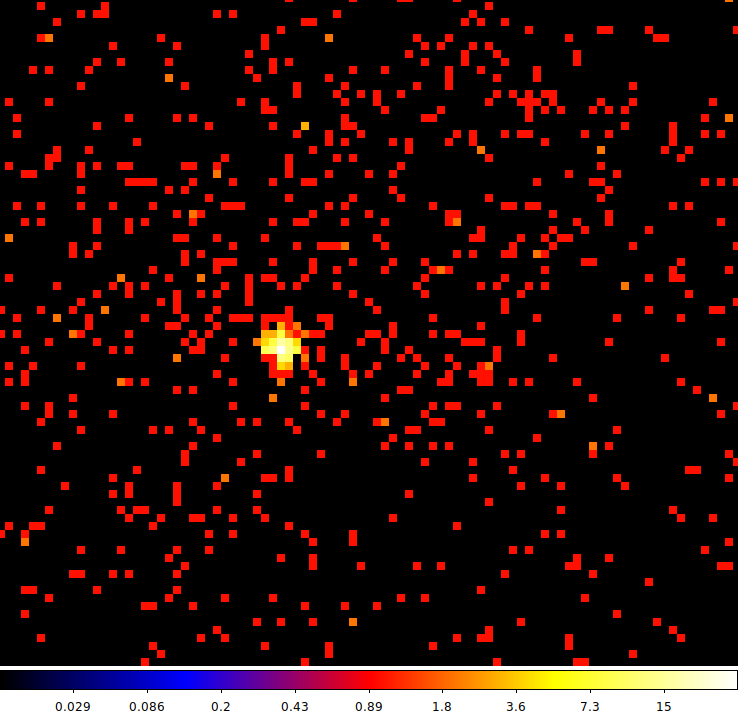

In [22]:
ds9 -cmap b merged.fits -bin filter 'energy=500:7000' \
  -bin about 3815 3975 -zoom 8 \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit


display < ds9_03.png


## Using reproject obs

In [23]:
punlearn reproject_events
reproject_obs \
  1842/repro/new_evt2.fits,1843/repro/acisf01843_repro_evt2.fits \
  merged3/ clob+


Running reproject_obs
Version: 15 November 2021

Verifying 2 observations.
Calculating new tangent point.
New tangent point: RA=18h 32m 21.361s Dec=-10d 34' 37.73"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 1843  2000-09-02   7.9 ACIS-012367 -245.857 153.4   2.6   -80
2 1842  2000-09-02   7.4 ACIS-012367 -231.239 153.4   2.6  +100

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to merged3/merged_evt.fits

The following files were created:

The reprojected FOV files:
     merged3/1843.fov
     merged3/1842.fov

The combined FOV file:
     merged3/merged.fov

The reprojected event files:
     merged3/1843_reproj_evt.fits
     merged3/1842_reproj_evt.fits

The merged event file:
     merged3/merged_evt.fits

   should not b

In [24]:
ds9 -cmap b merged3/merged_evt.fits -bin filter 'energy=500:7000' \
  -bin about 4120 4040 -zoom 8 \
  -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit


display < ds9_04.png

[1] 1939521
[1]+  Done                    ds9 -cmap b merged3/merged_evt.fits -bin filter 'energy=500:7000' -bin about 4120 4040 -zoom 8 -saveimage png ds9_04.png


In [25]:
/bin/rm -rf 1842 1843
mv -fv merged1/merged_evt.fits merged1_merged_evt.fits 
mv -fv merged2/merged_evt.fits merged2_merged_evt.fits 
mv -fv merged3/merged_evt.fits merged3_merged_evt.fits 
/bin/rm -rf merged1 merged2 merged3


renamed 'merged1/merged_evt.fits' -> 'merged1_merged_evt.fits'
renamed 'merged2/merged_evt.fits' -> 'merged2_merged_evt.fits'
renamed 'merged3/merged_evt.fits' -> 'merged3_merged_evt.fits'
